# Image Compression Using Principal Component Analysis.
---



Necessary Imports

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Path for the Image

In [2]:
path = "emoji.png"

# 1. Load and Prepare the data

1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.



> Using the `.open()` function of Pillow function to open the image in the given path.



> Using the `.resize()` function of Pillow function to resize the opened image.



> Using the `np.array()` function to convert the image into numpy array type.  





> Using the `.shape()` function to find the shape of the image.





Image size: (250, 250, 3)


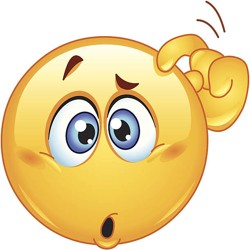

In [3]:
img = Image.open(path) #opening the image in the given path
img = img.resize((250,250)) #resizing the image
im = np.array(img) #stores the image in Numpy array.
print('Image size:', im.shape) #Displaying the updated size of the image
img

2. For the simplicity, convert the image into gray scale i.e. black and white.



> Using the `.convert()` to change the image to grayscale.



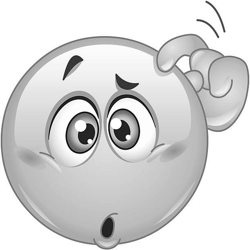

In [4]:
img_gray = img.convert("L") #Changing into grayscale
img_gray

In [5]:
img_gray_array = np.array(img_gray) #Converting the grayscale image to numpy.array type
img_gray_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(250, 250), dtype=uint8)

# 2. Standardize/Scale the data

1. Standardizing the Data to satisfy:<br><br>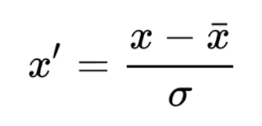

In [6]:
mean = np.mean(img_gray_array) #Mean Calculation
std = np.std(img_gray_array) #Standard Deviation Calculation
stand = (img_gray_array-mean)/std #Standardizing the data
stand

array([[0.84341844, 0.84341844, 0.84341844, ..., 0.84341844, 0.84341844,
        0.84341844],
       [0.84341844, 0.84341844, 0.84341844, ..., 0.84341844, 0.84341844,
        0.84341844],
       [0.84341844, 0.84341844, 0.84341844, ..., 0.84341844, 0.84341844,
        0.84341844],
       ...,
       [0.84341844, 0.84341844, 0.84341844, ..., 0.84341844, 0.84341844,
        0.84341844],
       [0.84341844, 0.84341844, 0.84341844, ..., 0.84341844, 0.84341844,
        0.84341844],
       [0.84341844, 0.84341844, 0.84341844, ..., 0.84341844, 0.84341844,
        0.84341844]], shape=(250, 250))

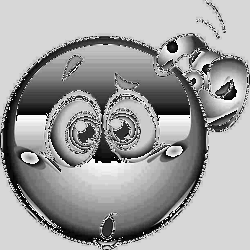

In [7]:
#Standardize Image
stand_img = np.array(stand*255, dtype=np.uint8)
Image.fromarray(stand_img)

# 3. Calculate Covariance Matrix

Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:<br><br>
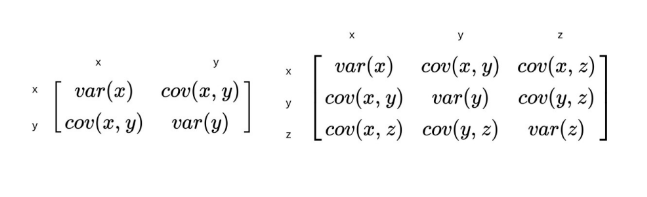



> Using the `.cov()` function to find out the covariance matrix.



In [8]:
cov_mat = np.cov(stand) #Calculating the covariance matrix
cov_mat

array([[ 3.58829898e-03,  1.80823187e-02,  1.49523476e-02, ...,
        -1.11335359e-03, -9.87336648e-04, -3.16877561e-04],
       [ 1.80823187e-02,  1.22949467e-01,  1.28225846e-01, ...,
        -6.51915477e-03, -5.78127242e-03, -1.85545174e-03],
       [ 1.49523476e-02,  1.28225846e-01,  2.00790063e-01, ...,
        -9.53728198e-03, -8.45778743e-03, -2.71445718e-03],
       ...,
       [-1.11335359e-03, -6.51915477e-03, -9.53728198e-03, ...,
         3.55848622e-01,  3.00020049e-01,  8.40505312e-02],
       [-9.87336648e-04, -5.78127242e-03, -8.45778743e-03, ...,
         3.00020049e-01,  3.57845259e-01,  1.23503298e-01],
       [-3.16877561e-04, -1.85545174e-03, -2.71445718e-03, ...,
         8.40505312e-02,  1.23503298e-01,  5.84365147e-02]],
      shape=(250, 250))

In [9]:
#Checking the number of rows and columns of the covariance Matrix
cov_mat.shape

(250, 250)



> Plotting the heatmap of the image. Using seaborn for generating the heatmap.



> Function used: `sns.heatmap(dataset.corr())`



> The `corr()` function is used to find the pairwise correlation of all columns in a dataframe. Correlation refers to the degree to which two variables move with coordination with each other.







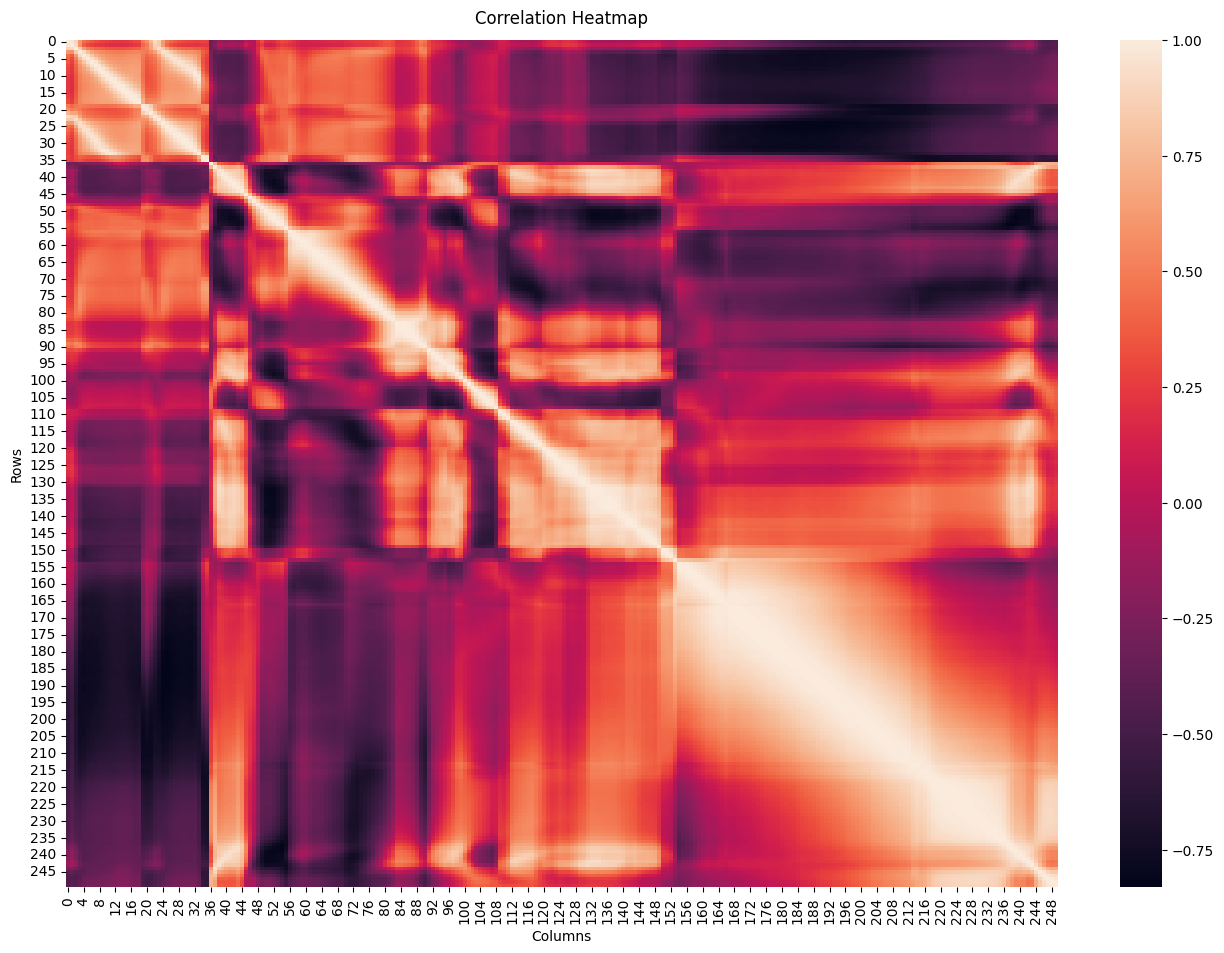

In [10]:
plt.figure(figsize=(16,11)) #Setting the size of the heatmap
columnsData = pd.DataFrame(cov_mat)
imgHeat = sns.heatmap(columnsData.corr())
imgHeat.set(xlabel = "Columns",ylabel = "Rows") #Setting labels for x axis and y axis
#Giving heatmap title and fontsize of 12
imgHeat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# 4. Eigen Decomposition



> Using `numpy.linalg.eig()` function to calculate the eigen values and eigen vectors.



In [11]:
#Eigen Vector and Eigen Values of Covariance Matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.02680318e-04  2.04853297e-03 -2.97066618e-04 ... -1.61593734e-03
   1.49021874e-02  1.13801053e-02]
 [-1.18693036e-03  1.28085674e-02 -1.66085308e-03 ...  1.84989120e-02
  -1.84961489e-02 -1.17912933e-02]
 [-4.38998586e-03  1.77876226e-02 -1.03512069e-02 ... -1.63023949e-02
   2.40989047e-02  1.74012337e-02]
 ...
 [ 2.51045076e-02 -6.44541040e-02 -4.29198430e-02 ... -1.00502916e-09
   1.46512660e-09  8.47356169e-10]
 [ 2.52303723e-02 -6.72402121e-02 -4.62737820e-02 ...  1.17608320e-08
  -1.77172861e-08 -1.07831303e-08]
 [ 8.89423770e-03 -2.21774439e-02 -1.62441116e-02 ...  1.79983671e-09
  -2.29163676e-09 -1.17747834e-09]]

Eigenvalues 
[ 4.96395406e+01  2.34884350e+01  1.74074084e+01  1.46228179e+01
  1.02935588e+01  9.64173076e+00  9.07782571e+00  7.07073587e+00
  5.38729531e+00  4.25961173e+00  3.84255368e+00  3.38747631e+00
  3.35039114e+00  2.86332142e+00  2.68742892e+00  2.52414813e+00
  2.39518812e+00  1.97974572e+00  1.71323967e+00  1.66855078e+00
  1.5957523



> Using the `numpy.linalg.inv()` function to find the inverse of the eigen vectors.



In [12]:
#Inverse of the Eigen Vectors
inverse = np.linalg.inv(eig_vecs)
inverse

array([[-3.02680318e-04, -1.18693036e-03, -4.38998586e-03, ...,
         2.51045076e-02,  2.52303723e-02,  8.89423770e-03],
       [ 2.04853297e-03,  1.28085674e-02,  1.77876226e-02, ...,
        -6.44541040e-02, -6.72402121e-02, -2.21774439e-02],
       [-2.97066618e-04, -1.66085308e-03, -1.03512069e-02, ...,
        -4.29198430e-02, -4.62737820e-02, -1.62441116e-02],
       ...,
       [-2.93208950e-03,  2.04646231e-02, -1.86449279e-02, ...,
        -8.52360186e-10,  9.99995147e-09,  1.45338942e-09],
       [ 1.36804041e-02, -2.21758838e-02,  2.52616798e-02, ...,
         1.47598092e-09, -1.74921807e-08, -2.61703831e-09],
       [ 2.20391082e-03,  2.66041973e-03,  8.13206504e-04, ...,
         6.35748105e-10, -8.84253710e-09, -7.44623193e-10]],
      shape=(250, 250))



> Using the `numpy.diag()` function to select the main diagonals of the matrix.



In [13]:
#Main Diagonal of the eigen values
diagonal = np.diag(eig_vals)
diagonal

array([[ 4.96395406e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.34884350e+01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.74074084e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.05266830e-16,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.26473509e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.40999820e-17]],
      shape=(250, 250))

Decompose a covariance matrix into eigen values and eigen vectors:<br><br>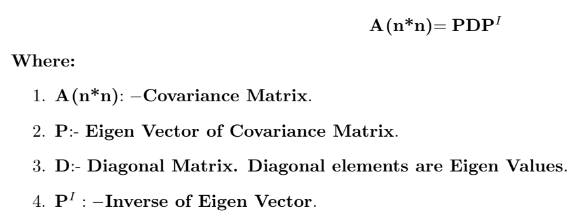

In [14]:
#Eigen Decomposition
eigen_decomposition = np.dot(eig_vecs, np.dot(diagonal,inverse))
eigen_decomposition

array([[ 3.58829898e-03,  1.80823187e-02,  1.49523476e-02, ...,
        -1.11335359e-03, -9.87336648e-04, -3.16877561e-04],
       [ 1.80823187e-02,  1.22949467e-01,  1.28225846e-01, ...,
        -6.51915477e-03, -5.78127242e-03, -1.85545174e-03],
       [ 1.49523476e-02,  1.28225846e-01,  2.00790063e-01, ...,
        -9.53728198e-03, -8.45778743e-03, -2.71445718e-03],
       ...,
       [-1.11335359e-03, -6.51915477e-03, -9.53728198e-03, ...,
         3.55848622e-01,  3.00020049e-01,  8.40505312e-02],
       [-9.87336648e-04, -5.78127242e-03, -8.45778743e-03, ...,
         3.00020049e-01,  3.57845259e-01,  1.23503298e-01],
       [-3.16877561e-04, -1.85545174e-03, -2.71445718e-03, ...,
         8.40505312e-02,  1.23503298e-01,  5.84365147e-02]],
      shape=(250, 250))

# 5. Identify Principal Components



> Using `numpy.argsort()` to perform a sort in the axis



In [15]:
sorted_array = np.argsort(-eig_vals)
eig_vals = eig_vals[sorted_array]
eig_vecs = eig_vecs[:, sorted_array]

In [16]:
#Calculating the variance explained
tot = sum(eig_vals) #sum to find the total after adding all the eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]



> Using the `numpy.cumsum()` function to calculate the cummulative variance explained.



In [17]:
#Calculating the cummulative variance explained
cum_var_exp = np.cumsum(var_exp)

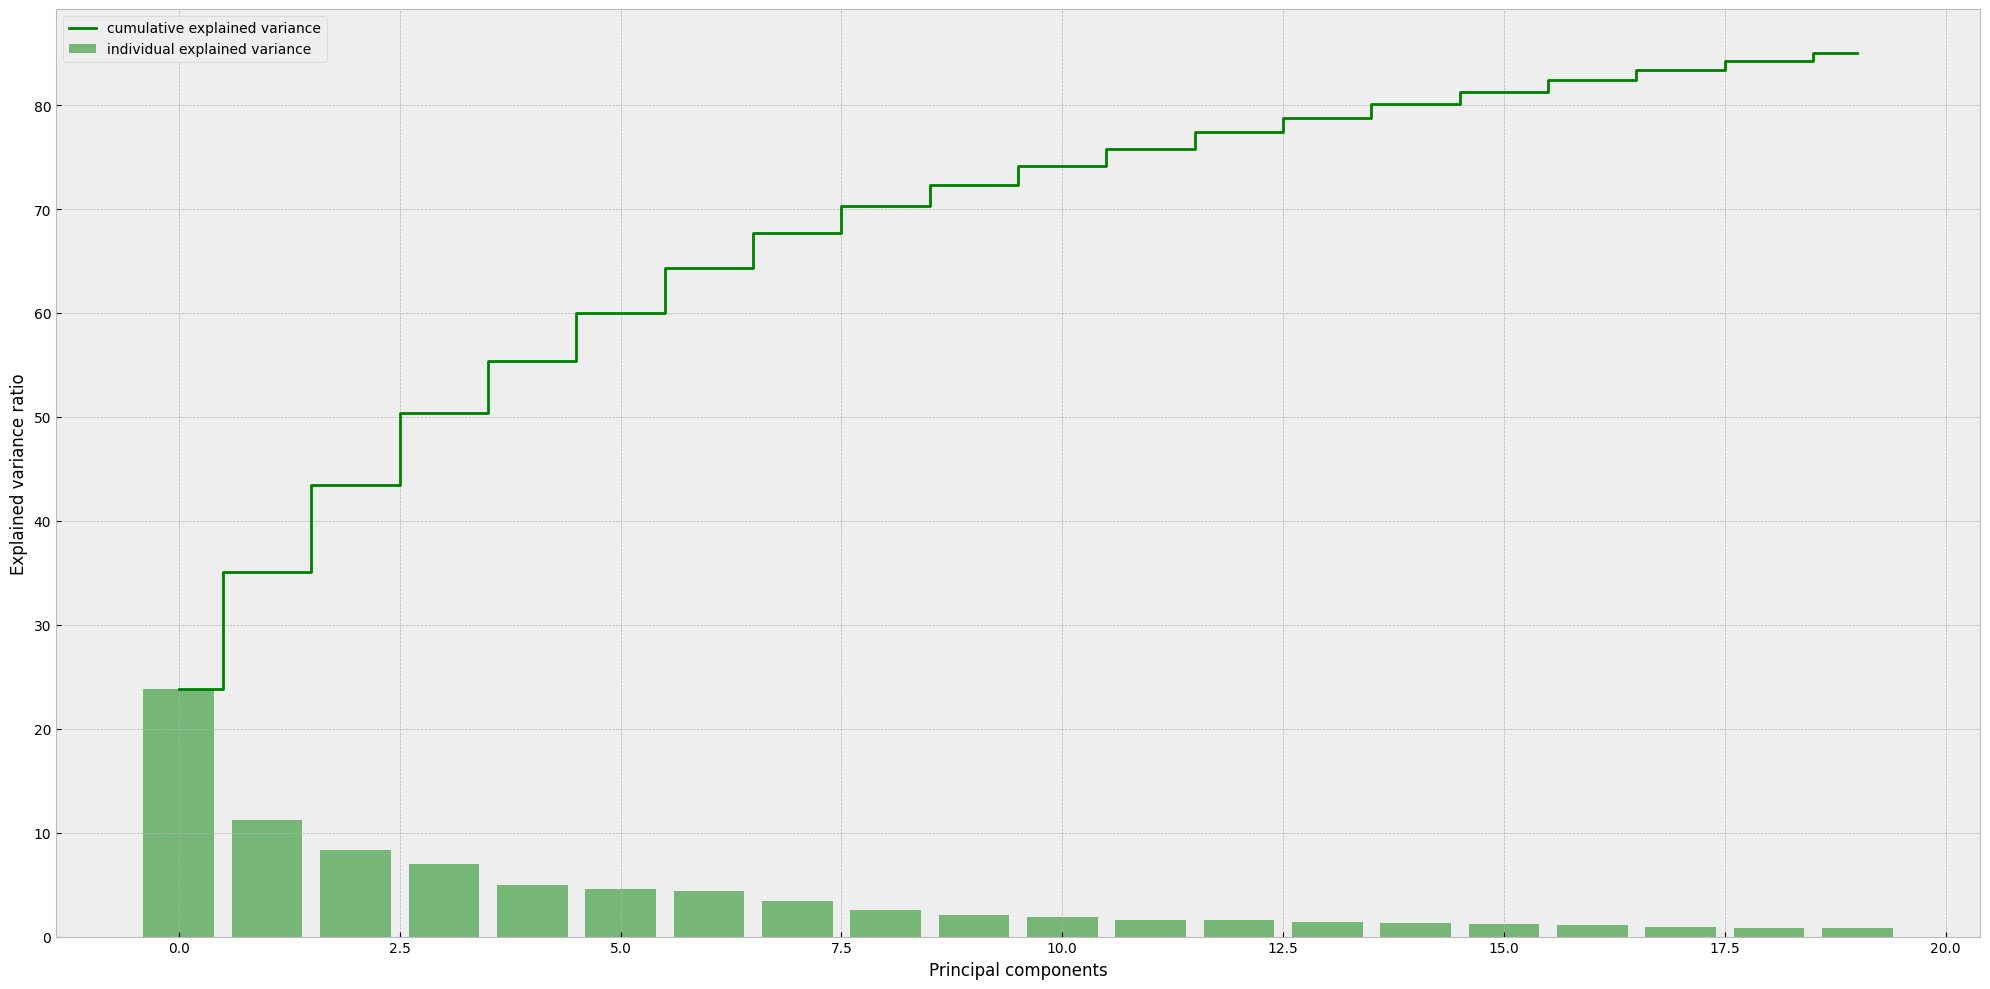

In [19]:
var_exp = [var_exp[i]for i in range(20)]
cum_var_exp = [cum_var_exp[i]for i in range(20)]

with plt.style.context('bmh'):
    plt.figure(figsize = (20, 10)) #Setting the size of the figure
    plt.bar(range(20), var_exp, alpha = 0.5, align = 'center',
            label = 'individual explained variance',color = "green")
    plt.step(range(20), cum_var_exp, where = 'mid',
             label = 'cumulative explained variance',color = "green")
    plt.ylabel('Explained variance ratio') #y axis label
    plt.xlabel('Principal components') #x axis label
    plt.legend(loc='best')
    plt.tight_layout()

Picking three different combination of principal components with various explained variance
value and compare the result.

In [20]:
#Selecting three principal components
PCA1 = eig_vecs[:, :50]
PCA2 = eig_vecs[:, :125]
PCA3 = eig_vecs[:, :250]
print(PCA1.shape,PCA2.shape,PCA3.shape)

(250, 50) (250, 125) (250, 250)


# 6. Reconstruction of the image



> Using `numpy.dot()` function to calculate the dot product



In [ ]:
# Transforming the data onto PCA1
first_transformed = np.dot(img_gray_array, PCA1)
# Transforming the data onto PCA2
second_transformed = np.dot(img_gray_array, PCA2)
# Transforming the data onto PCA3
third_transformed = np.dot(img_gray_array, PCA3)

(250, 50)

In [ ]:
#.T is used to find the transpose of the matrix
first_data = np.dot(first_transformed, PCA1.T)
second_data = np.dot(second_transformed, PCA2.T)
third_data = np.dot(third_transformed, PCA3.T)



> Using the `.clip()` function to set the range for the values in the array



> The function takes these parameters `clip(array_name, lower_limit, upper_limit)`





In [ ]:
first_data = np.clip(first_data, 0, 255)
second_data = np.clip(second_data, 0, 255)
third_data = np.clip(third_data, 0, 255)

In [ ]:
#Creating images from all three datas
first_data_image = Image.fromarray(first_data)
second_data_image = Image.fromarray(second_data)
third_data_image = Image.fromarray(third_data)

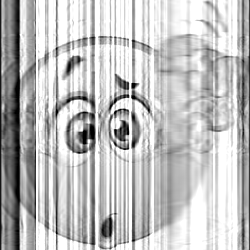

In [ ]:
first_data_image #Showing the first image

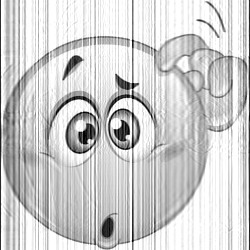

In [ ]:
second_data_image #Showing the second image

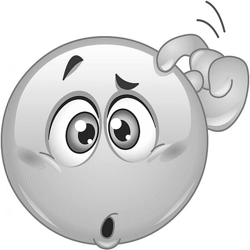

In [ ]:
third_data_image #Showing the third image



> Thus, the higher the PCA, the higher the picture quality will be. In the first image PCA of 50 has been taken which has the lowest quality among the PCA, so the quality of the first image is comparatively low when compared to that of the second and third images.



> In the second image PCA of 125 has been taken which makes the quality of the picture better than the first image but still not of the highest quality.



> Finally, in the third image PCA of 250 (highest possible) has been taken which gives us the best quality of the image after reconstruction.





